## Principal component analysis on the metadata to visualise the data in a lower dimensional space 

In [0]:
## data science essentials 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## path to load data from 
ROOT = "/content/drive/My Drive/"

In [0]:
df = pd.read_csv(ROOT+ "data/unc_training_data.csv")
print(df.info())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cell              64320 non-null  object
 1   time              64320 non-null  int64 
 2   x                 64320 non-null  int64 
 3   y                 64320 non-null  int64 
 4   size              64320 non-null  int64 
 5   compact_cellname  64320 non-null  object
 6   label             64320 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ MB
None


Index(['cell', 'time', 'x', 'y', 'size', 'compact_cellname', 'label'], dtype='object')

## Selecting 4 columns which are to be reduced to 2 principal components 
* `StandardScaler().fit_transform(x)` standardizes the features by removing the mean and scaling them to unit variance. 

In simpler words, it will transform the data such that its distribution will have a mean value 0 and standard deviation of 1.

In [0]:
target_names = df.compact_cellname.unique()
x = df[["x", "y", "time", "size"]].values
y = df["label"].values
x = StandardScaler().fit_transform(x)

## Generating the principal components
* `n_components = 2` means the data would be reduced to 2 dimennsions, feel free to play around with that value to get higher dimensional components. 

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [0]:
final_df = pd.concat([principalDf, df[['label']]], axis = 1)

## Visualising the principal components in a scatterplot 

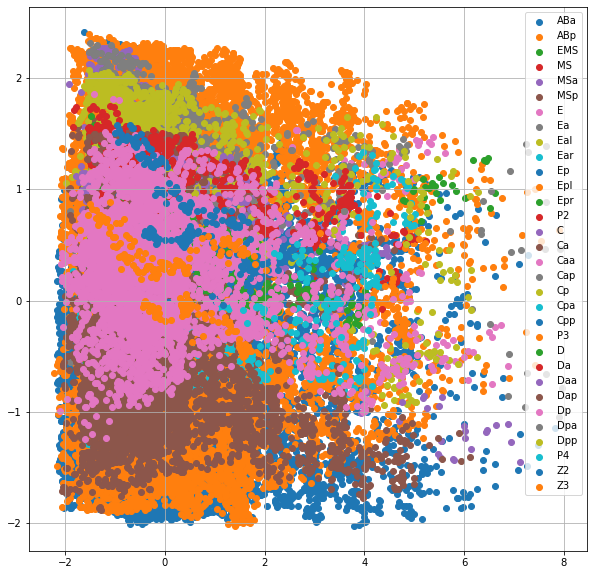

In [0]:
targets = target_names
plt.rcParams['figure.figsize'] = 10, 10

for label in range (len(targets)):
    instances = final_df[final_df["label"] == label]
    plt.scatter(instances["pc1"], instances["pc2"], label = targets[label])
    
plt.grid()
plt.legend()
plt.show()

### It can be seen how lineages with same ancestors (for example `ABa` and `ABp`) occupy similar regions of the scatterplot

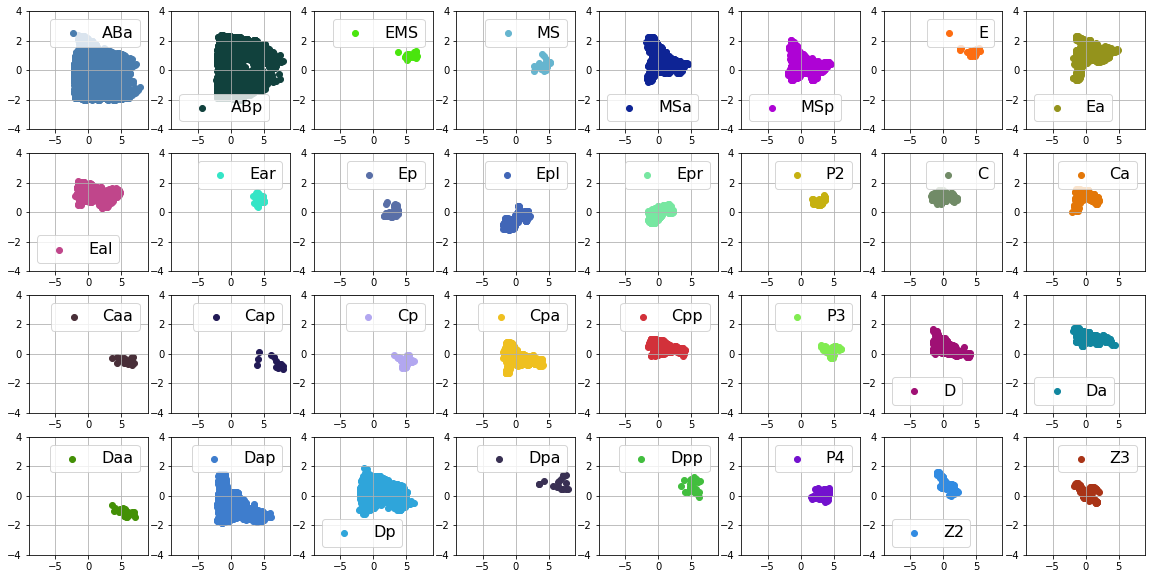

In [0]:
fig, axs = plt.subplots(4,8, figsize = (20,10))

for label in range (len(targets)):

    instances = final_df[final_df["label"] == label]
    axs.flat[label].scatter(instances["pc1"], instances["pc2"], label = targets[label], c = np.random.rand(3,).reshape(1,-1))
    axs.flat[label].set_xlim([-9, 9])
    axs.flat[label].set_ylim([-4, 4])
    axs.flat[label].grid()

    axs.flat[label].legend(fontsize = 16)